# Corona-Fallzahlen im Landkreis Göttingen

Dieses Jupyter Notebook dient der Analysze und Visualisierung von Corona-Fallzahlen aus dem Landkreis Göttingen. Die Daten wurden mit Skripten aus [diesem git-Repository](https://github.com/nichtich/corona-goettingen) von der Homepage der Stadt Göttingen gesammelt.

Mitarbeit ist sehr willkommen, vor allem was die Visualisierung anbelangt!

In [24]:
import pandas as pd

In [25]:
zahlen = pd.read_csv('fallzahlen.csv')

In [30]:
# zahlen

In [27]:
friedland = zahlen[zahlen["gemeinde"]=="Gemeinde Friedland"][['created','faelle','infizierte']]

<AxesSubplot:>

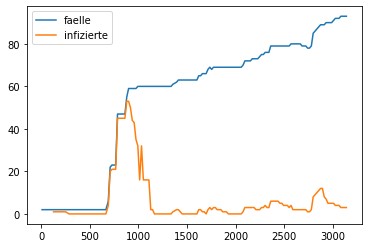

In [31]:
friedland.plot()